# Tiền xử lý dữ liệu

## Thêm thư viện

In [ ]:
install.packages("e1071")
install.packages("caret")
install.packages("ggplot2")
install.packages("smotefamily")
library(e1071)
library(caret)
library(ggplot2)
library(smotefamily)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘FNN’, ‘dbscan’, ‘igraph’


Loading required package: ggplot2

Loading required package: lattice



## Nạp dữ liệu

In [ ]:
wine <- read.csv("winequality-red - Copy.csv")

In [ ]:
wine

fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1     7.4          0.700            0.00        1.9            0.076    
2     7.8          0.880            0.00        2.6            0.098    
3     7.8          0.760            0.04        2.3            0.092    
4    11.2          0.280            0.56        1.9            0.075    
5     7.4          0.700            0.00        1.9            0.076    
6     7.4          0.660            0.00        1.8            0.075    
7     7.9          0.600            0.06        1.6            0.069    
8     7.3          0.650            0.00        1.2            0.065    
9     7.8          0.580            0.02        2.0            0.073    
10    7.5          0.500            0.36        6.1            0.071    
11    6.7          0.580            0.08        1.8            0.097    
12    7.5          0.500            0.36        6.1            0.071    
13    5.6          0.615            0.00        1.6            0.089    
14    7.8          0.610            0.29        1.6            0.114    
15    8.9          0.620            0.18        3.8            0.176    
16    8.9          0.620            0.19        3.9            0.170    
17    8.5          0.280            0.56        1.8            0.092    
18    8.1          0.560            0.28        1.7            0.368    
19    7.4          0.590            0.08        4.4            0.086    
20    7.9          0.320            0.51        1.8            0.341    
21    8.9          0.220            0.48        1.8            0.077    
22    7.6          0.390            0.31        2.3            0.082    
23    7.9          0.430            0.21        1.6            0.106    
24    8.5          0.490            0.11        2.3            0.084    
25    6.9          0.400            0.14        2.4            0.085    
26    6.3          0.390            0.16        1.4            0.080    
27    7.6          0.410            0.24        1.8            0.080    
28    7.9          0.430            0.21        1.6            0.106    
29    7.1          0.710            0.00        1.9            0.080    
30    7.8          0.645            0.00        2.0            0.082    
⋮    ⋮             ⋮                ⋮           ⋮              ⋮        
1570 6.2           0.510            0.14         1.9           0.056    
1571 6.4           0.360            0.53         2.2           0.230    
1572 6.4           0.380            0.14         2.2           0.038    
1573 7.3           0.690            0.32         2.2           0.069    
1574 6.0           0.580            0.20         2.4           0.075    
1575 5.6           0.310            0.78        13.9           0.074    
1576 7.5           0.520            0.40         2.2           0.060    
1577 8.0           0.300            0.63         1.6           0.081    
1578 6.2           0.700            0.15         5.1           0.076    
1579 6.8           0.670            0.15         1.8           0.118    
1580 6.2           0.560            0.09         1.7           0.053    
1581 7.4           0.350            0.33         2.4           0.068    
1582 6.2           0.560            0.09         1.7           0.053    
1583 6.1           0.715            0.10         2.6           0.053    
1584 6.2           0.460            0.29         2.1           0.074    
1585 6.7           0.320            0.44         2.4           0.061    
1586 7.2           0.390            0.44         2.6           0.066    
1587 7.5           0.310            0.41         2.4           0.065    
1588 5.8           0.610            0.11         1.8           0.066    
1589 7.2           0.660            0.33         2.5           0.068    
1590 6.6           0.725            0.20         7.8           0.073    
1591 6.3           0.550            0.15         1.8           0.077    
1592 5.4           0.740            0.09         1.7           

In [ ]:
str(wine)


'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


## Tạo nhãn nhị phân: good (>=7) = 1, not good (<7) = 0

In [ ]:
wine$quality_label <- ifelse(wine$quality >= 7, 1, 0)
wine$quality_label <- as.factor(wine$quality_label)
wine$quality <- NULL


## Phân chia thành phần tập huấn luyện và kiểm thử

In [ ]:
set.seed(123)
train_index <- createDataPartition(wine$quality_label, p = 0.8, list = FALSE)
train_data <- wine[train_index, ]
test_data  <- wine[-train_index, ]

## ÁP DỤNG SMOTE TRÊN TẬP HUẤN LUYỆN

In [ ]:
train_x <- train_data[, -ncol(train_data)]
train_y <- as.numeric(as.character(train_data$quality_label))
smote_result <- SMOTE(train_x, train_y, K = 5)
train_smote <- smote_result$data

## Chuyển lại thành factor

In [ ]:
train_smote$quality_label <- as.factor(train_smote$class)
train_smote$class <- NULL

cat("Phân bố sau SMOTE:\n")
print(table(train_smote$quality_label))

Phân bố sau SMOTE:

   0    1 
1106 1044 


## Chuẩn hóa(feature scaling)

In [ ]:
pre_proc <- preProcess(train_smote[, -ncol(train_smote)], method = c("center", "scale"))
train_scaled <- train_smote
test_scaled  <- test_data
train_scaled[, -ncol(train_scaled)] <- predict(pre_proc, train_smote[, -ncol(train_smote)])
test_scaled[, -ncol(test_scaled)]   <- predict(pre_proc, test_data[, -ncol(test_data)])

## Huấn luyện bằng mô hình Naive Bayes

In [ ]:
model_nb <- naiveBayes(quality_label ~ ., data = train_scaled)


## Đánh giá mô hình

In [ ]:
pred <- predict(model_nb, newdata = test_scaled)
conf_mat <- confusionMatrix(pred, test_scaled$quality_label)
print(conf_mat)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 201  12
         1  75  31
                                          
               Accuracy : 0.7273          
                 95% CI : (0.6749, 0.7754)
    No Information Rate : 0.8652          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2775          
                                          
 Mcnemar's Test P-Value : 2.989e-11       
                                          
            Sensitivity : 0.7283          
            Specificity : 0.7209          
         Pos Pred Value : 0.9437          
         Neg Pred Value : 0.2925          
             Prevalence : 0.8652          
         Detection Rate : 0.6301          
   Detection Prevalence : 0.6677          
      Balanced Accuracy : 0.7246          
                                          
       'Positive' Class : 0               
                              

## Trực quan hóa đường biên phân lớp

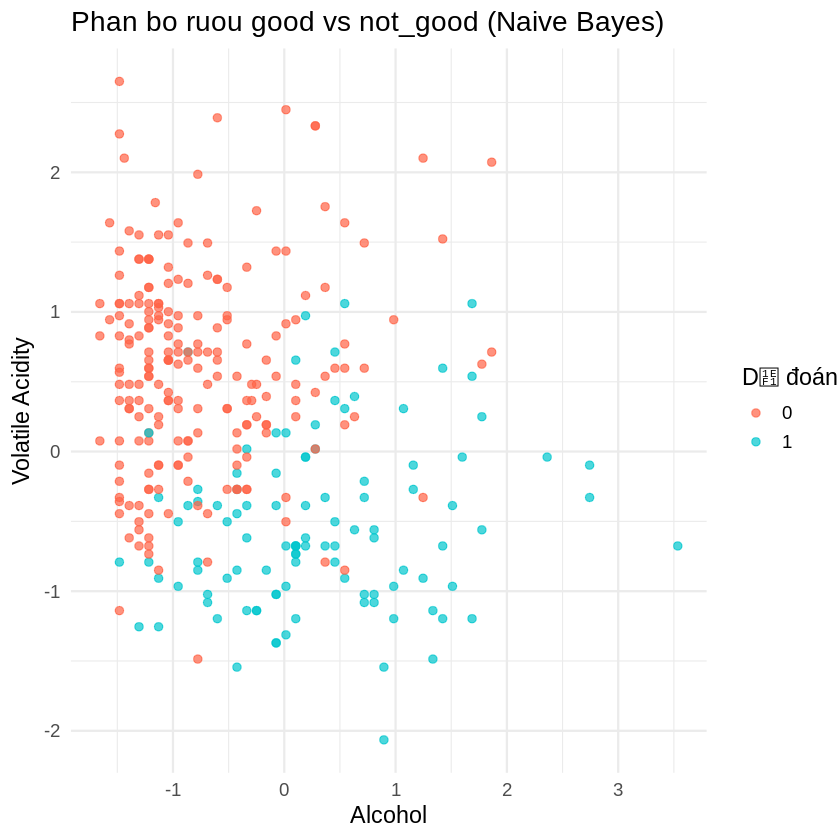

In [ ]:
library(ggplot2)

# Tạo dữ liệu biểu đồ từ test set
plot_data <- test_scaled[, c("alcohol", "volatile.acidity")]
plot_data$prediction <- predict(model_nb, newdata = test_scaled)

# Vẽ biểu đồ phân bố rượu good vs not_good (theo dự đoán)
ggplot(plot_data, aes(x = alcohol, y = volatile.acidity, color = prediction)) +
  geom_point(alpha = 0.7, size = 2) +
  labs(
    title = "Phan bo ruou good vs not_good (Naive Bayes)",
    x = "Alcohol",
    y = "Volatile Acidity",
    color = "Dự đoán"
  ) +
  scale_color_manual(values = c("0" = "tomato", "1" = "turquoise3")) +
  theme_minimal(base_size = 14)


## Dữ liệu liệu ngẫu nhiên


In [ ]:
library(e1071)

# Chỉ chọn hai biến đặc trưng để huấn luyện mô hình Naive Bayes
train_nb <- train_data[, c("alcohol", "volatile.acidity", "quality_label")]
test_nb <- test_data[, c("alcohol", "volatile.acidity", "quality_label")]

# Huấn luyện mô hình
nb_model <- naiveBayes(quality_label ~ ., data = train_nb)


In [ ]:
new_data <- data.frame(
  alcohol = 12.5,
  volatile.acidity = 0.35
)

predict(nb_model, new_data)


[1] 1
Levels: 0 1

## ROC Curve + AUC

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC: 0.8176609 


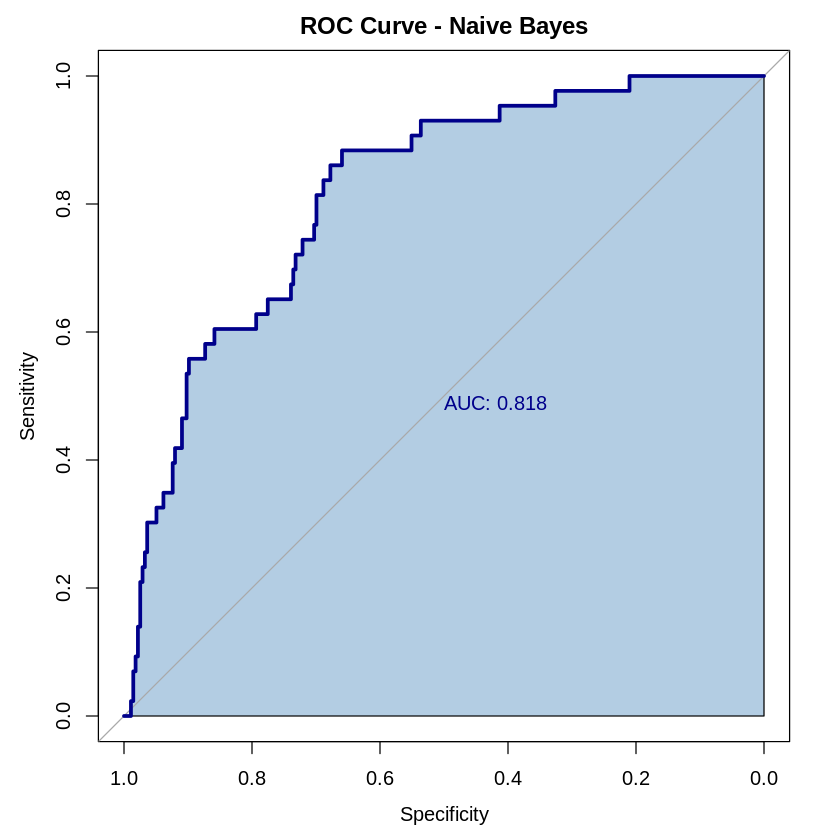

In [ ]:
library(pROC)

# Dự đoán xác suất cho lớp 0 và 1
nb_probs <- predict(model_nb, newdata = test_scaled, type = "raw")

# Tính ROC cho lớp "1" (good wine)
roc_nb <- roc(response = test_scaled$quality_label,
              predictor = nb_probs[, "1"])  # Lưu ý: "1" là nhãn good

# Vẽ ROC
plot(roc_nb, col = "darkblue", lwd = 3,
     main = "ROC Curve - Naive Bayes",
     print.auc = TRUE, auc.polygon = TRUE, auc.polygon.col = "#b3cde3")

# Hiển thị AUC
cat("AUC:", auc(roc_nb), "\n")


## Confusion Matrix Heatmap

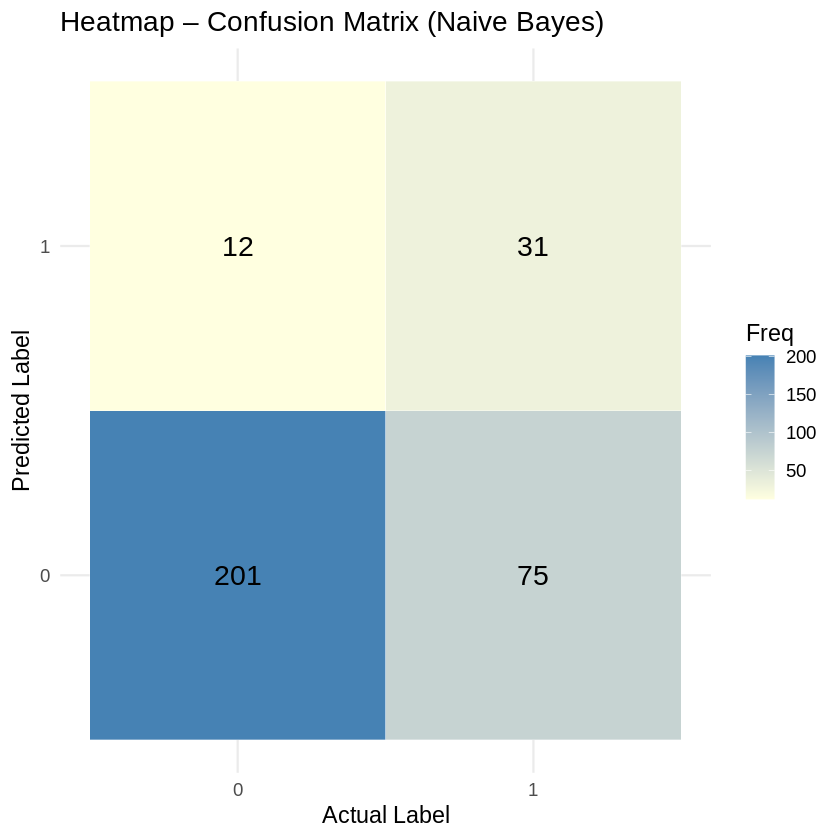

In [ ]:
library(reshape2)
library(ggplot2)

# Lấy bảng confusion từ kết quả đánh giá
cm_nb <- conf_mat$table

# Chuyển thành data frame với 3 cột: Actual, Predicted, Freq
cm_df <- as.data.frame(cm_nb)
colnames(cm_df) <- c("Actual", "Predicted", "Freq")  # Chỉnh tên cột đúng thứ tự

# Vẽ heatmap
ggplot(cm_df, aes(x = Actual, y = Predicted, fill = Freq)) +
  geom_tile(color = "white") +
  geom_text(aes(label = Freq), size = 6, color = "black") +
  scale_fill_gradient(low = "lightyellow", high = "steelblue") +
  labs(title = "Heatmap – Confusion Matrix (Naive Bayes)",
       x = "Actual Label", y = "Predicted Label") +
  theme_minimal(base_size = 14)


## Biểu đồ biểu diễn Gaussian likelihood cho từng đặc trưng

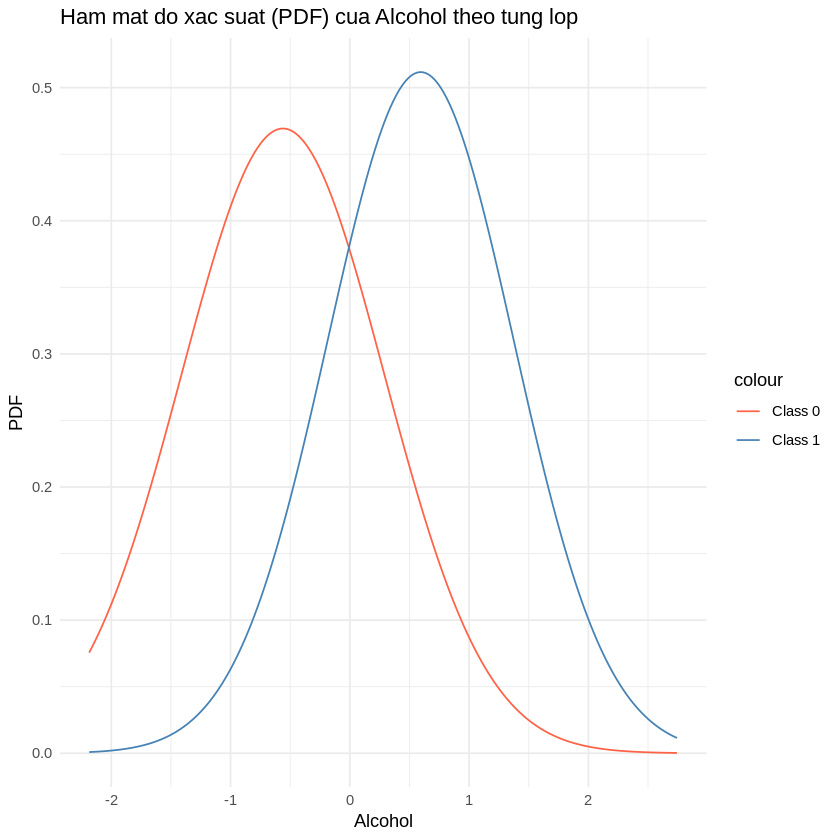

In [ ]:
# Ước lượng trung bình và độ lệch chuẩn cho mỗi lớp
mean_0 <- mean(train_scaled$alcohol[train_scaled$quality_label == "0"])
sd_0 <- sd(train_scaled$alcohol[train_scaled$quality_label == "0"])
mean_1 <- mean(train_scaled$alcohol[train_scaled$quality_label == "1"])
sd_1 <- sd(train_scaled$alcohol[train_scaled$quality_label == "1"])

# Vẽ PDF
x_vals <- seq(min(train_scaled$alcohol), max(train_scaled$alcohol), length = 200)
df_pdf <- data.frame(
  x = x_vals,
  pdf_0 = dnorm(x_vals, mean_0, sd_0),
  pdf_1 = dnorm(x_vals, mean_1, sd_1)
)

ggplot(df_pdf, aes(x = x)) +
  geom_line(aes(y = pdf_0, color = "Class 0")) +
  geom_line(aes(y = pdf_1, color = "Class 1")) +
  labs(title = "Ham mat do xac suat (PDF) cua Alcohol theo tung lop",
       x = "Alcohol", y = "PDF") +
  scale_color_manual(values = c("Class 0" = "tomato", "Class 1" = "steelblue")) +
  theme_minimal()
